# Association Rules: Market Basket Analysis

> **"Association rules discover hidden relationships in transactional data."**

## Learning Objectives
- Understand the Apriori algorithm and association rule mining
- Implement association rule mining from scratch
- Learn about support, confidence, and lift metrics
- Master market basket analysis techniques
- Apply association rules to recommendation systems


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Association Rules Fundamentals

### What are Association Rules?
Association rules are if-then statements that help uncover relationships between different items in large datasets. They are commonly used in market basket analysis to find patterns in customer purchasing behavior.

### Key Metrics

#### 1. Support
The frequency of occurrence of an itemset in the dataset.
$Support(A) = \frac{Count(A)}{Total\ Transactions}$

#### 2. Confidence
The probability of finding the RHS items in transactions that contain the LHS items.
$Confidence(A \rightarrow B) = \frac{Support(A \cup B)}{Support(A)}$

#### 3. Lift
The ratio of the observed support to the expected support if A and B were independent.
$Lift(A \rightarrow B) = \frac{Confidence(A \rightarrow B)}{Support(B)}$


In [4]:
# Generate sample market basket data
np.random.seed(42)

# Define products
products = ['Bread', 'Milk', 'Eggs', 'Butter', 'Cheese', 'Yogurt', 'Apples', 'Bananas', 
           'Coffee', 'Tea', 'Sugar', 'Flour', 'Rice', 'Pasta', 'Chicken', 'Beef']

# Generate transactions
n_transactions = 1000
transactions = []

for _ in range(n_transactions):
    # Random number of items per transaction (1-8)
    n_items = np.random.randint(1, 9)
    
    # Random selection of products
    transaction = np.random.choice(products, size=n_items, replace=False)
    transactions.append(transaction.tolist())

print("Sample Transactions:")
print("=" * 50)
for i, transaction in enumerate(transactions[:10]):
    print(f"Transaction {i+1}: {transaction}")

print(f"\nTotal transactions: {len(transactions)}")
print(f"Total unique products: {len(products)}")

# Convert to binary matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(f"\nBinary matrix shape: {df.shape}")
print(f"Sample of binary matrix:")
print(df.head())


Sample Transactions:
Transaction 1: ['Bread', 'Milk', 'Yogurt', 'Beef', 'Flour', 'Chicken', 'Coffee']
Transaction 2: ['Pasta', 'Chicken', 'Apples', 'Eggs', 'Coffee']
Transaction 3: ['Tea', 'Milk']
Transaction 4: ['Sugar', 'Bananas', 'Bread', 'Eggs']
Transaction 5: ['Beef', 'Chicken', 'Cheese', 'Tea', 'Coffee', 'Apples', 'Sugar']
Transaction 6: ['Eggs', 'Rice', 'Coffee', 'Pasta', 'Cheese', 'Yogurt', 'Bread']
Transaction 7: ['Milk', 'Yogurt', 'Eggs', 'Beef', 'Butter', 'Chicken', 'Pasta']
Transaction 8: ['Rice', 'Tea', 'Chicken']
Transaction 9: ['Butter', 'Milk', 'Flour', 'Coffee', 'Chicken', 'Bread', 'Tea', 'Sugar']
Transaction 10: ['Pasta', 'Chicken', 'Milk']

Total transactions: 1000
Total unique products: 16

Binary matrix shape: (1000, 16)
Sample of binary matrix:
   Apples  Bananas   Beef  Bread  Butter  Cheese  Chicken  Coffee   Eggs  \
0   False    False   True   True   False   False     True    True  False   
1    True    False  False  False   False   False     True    True   Tru

Frequent Itemsets:
   support   itemsets
0    0.288   (Apples)
1    0.284  (Bananas)
2    0.278     (Beef)
3    0.263    (Bread)
4    0.306   (Butter)
5    0.272   (Cheese)
6    0.312  (Chicken)
7    0.282   (Coffee)
8    0.273     (Eggs)
9    0.266    (Flour)

Association Rules:
Number of rules found: 240
Columns: ['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'representativity', 'leverage', 'conviction', 'zhangs_metric', 'jaccard', 'certainty', 'kulczynski']

Top 10 Association Rules:
--------------------------------------------------------------------------------
Rule: ['Cheese'] -> ['Butter']
  Support: 0.103, Confidence: 0.379, Lift: 1.238

Rule: ['Milk'] -> ['Chicken']
  Support: 0.114, Confidence: 0.376, Lift: 1.206

Rule: ['Coffee'] -> ['Butter']
  Support: 0.106, Confidence: 0.376, Lift: 1.228

Rule: ['Beef'] -> ['Pasta']
  Support: 0.103, Confidence: 0.371, Lift: 1.286

Rule: ['Coffee'] -> ['Chicken']
  Support: 0.1

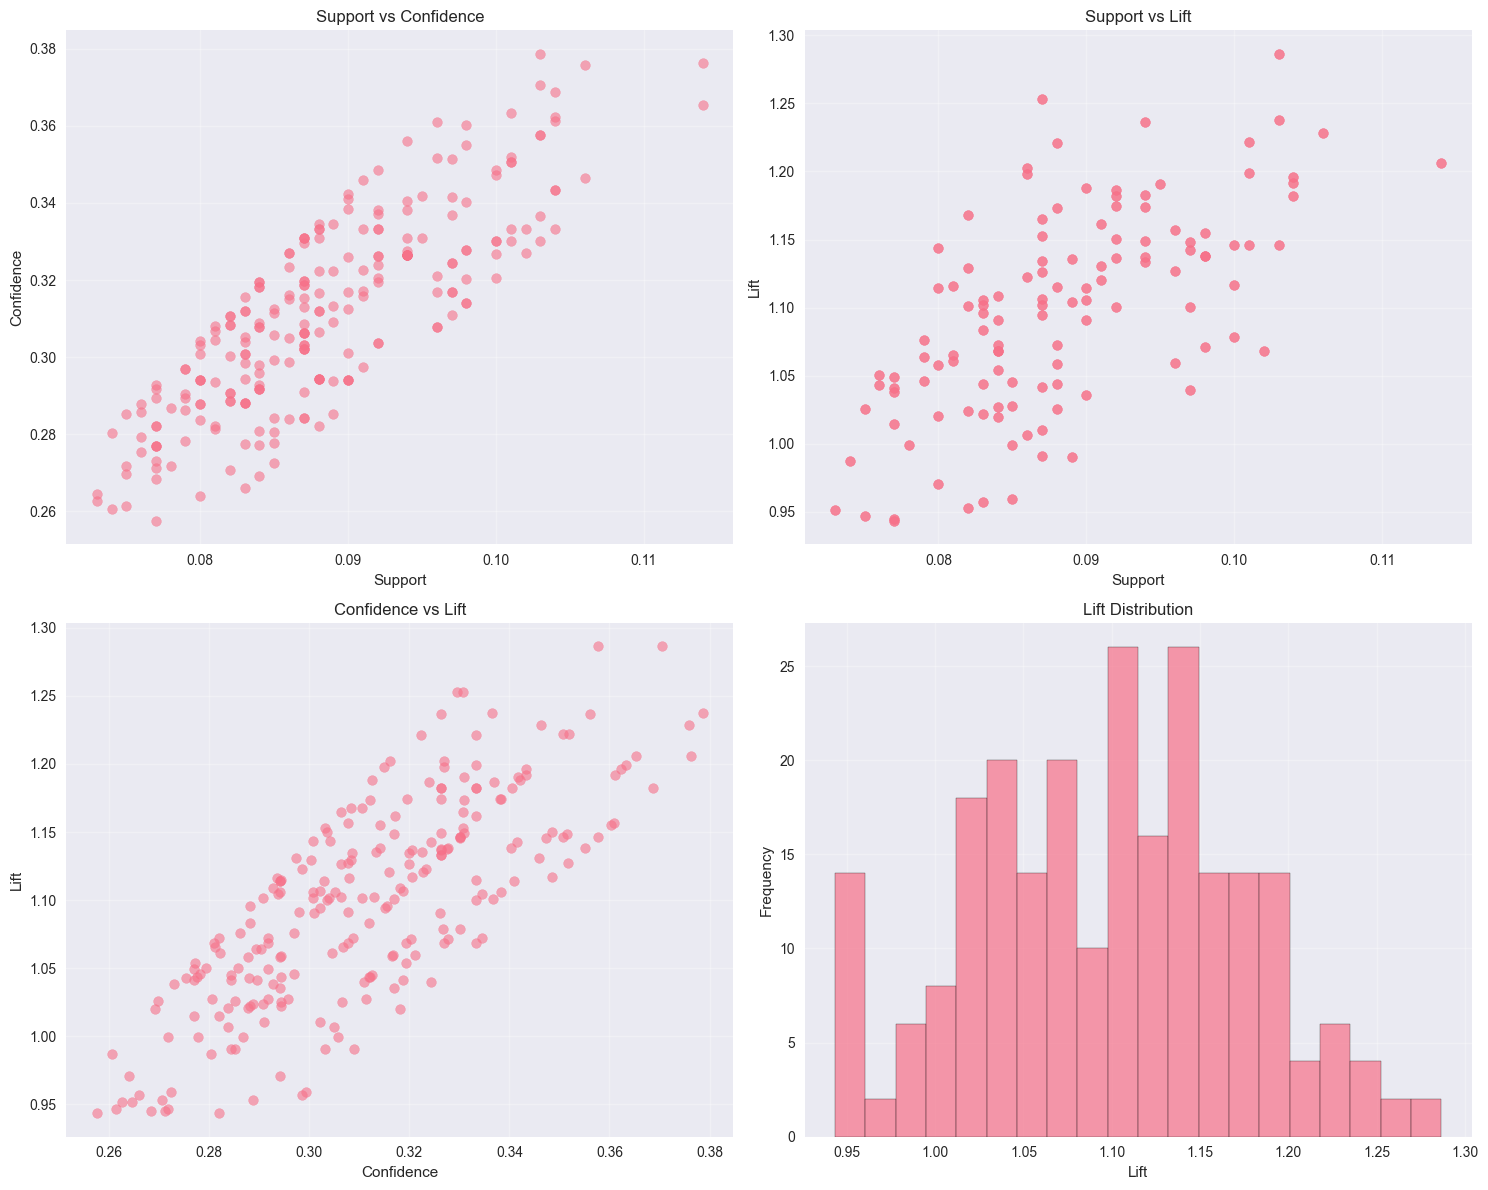

Rule Statistics:
Average Support: 0.088
Average Confidence: 0.312
Average Lift: 1.098
Max Lift: 1.286
Min Lift: 0.943


In [5]:
# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

print("Frequent Itemsets:")
print("=" * 50)
print(frequent_itemsets.head(10))

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print(f"\nAssociation Rules:")
print("=" * 50)
print(f"Number of rules found: {len(rules)}")
print(f"Columns: {list(rules.columns)}")

# Display top rules
if len(rules) > 0:
    print(f"\nTop 10 Association Rules:")
    print("-" * 80)
    
    # Sort by confidence
    top_rules = rules.sort_values('confidence', ascending=False).head(10)
    
    for idx, rule in top_rules.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        support = rule['support']
        confidence = rule['confidence']
        lift = rule['lift']
        
        print(f"Rule: {antecedents} -> {consequents}")
        print(f"  Support: {support:.3f}, Confidence: {confidence:.3f}, Lift: {lift:.3f}")
        print()

# Visualize association rules
if len(rules) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Support vs Confidence
    axes[0,0].scatter(rules['support'], rules['confidence'], alpha=0.6)
    axes[0,0].set_xlabel('Support')
    axes[0,0].set_ylabel('Confidence')
    axes[0,0].set_title('Support vs Confidence')
    axes[0,0].grid(True, alpha=0.3)
    
    # Support vs Lift
    axes[0,1].scatter(rules['support'], rules['lift'], alpha=0.6)
    axes[0,1].set_xlabel('Support')
    axes[0,1].set_ylabel('Lift')
    axes[0,1].set_title('Support vs Lift')
    axes[0,1].grid(True, alpha=0.3)
    
    # Confidence vs Lift
    axes[1,0].scatter(rules['confidence'], rules['lift'], alpha=0.6)
    axes[1,0].set_xlabel('Confidence')
    axes[1,0].set_ylabel('Lift')
    axes[1,0].set_title('Confidence vs Lift')
    axes[1,0].grid(True, alpha=0.3)
    
    # Lift distribution
    axes[1,1].hist(rules['lift'], bins=20, alpha=0.7, edgecolor='black')
    axes[1,1].set_xlabel('Lift')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].set_title('Lift Distribution')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("Rule Statistics:")
    print("=" * 50)
    print(f"Average Support: {rules['support'].mean():.3f}")
    print(f"Average Confidence: {rules['confidence'].mean():.3f}")
    print(f"Average Lift: {rules['lift'].mean():.3f}")
    print(f"Max Lift: {rules['lift'].max():.3f}")
    print(f"Min Lift: {rules['lift'].min():.3f}")
else:
    print("No association rules found with the given parameters.")
    print("Try lowering the min_support or min_threshold values.")
